# <center>Statistický projekt 4.A 2022</center>

## Téma:

# <center>Vyhodnocení korelace změny v ceně akcie Googlu na obchovaném objemu dané akcie</center>

### <div align="right">Vypracoval: Jan Faflík</div>

Tento projekt byl vypracována pomocí programovacího jazyka Python 3.9.0, ve výpočetním prostředí prostředí Jupyter Notebook 6.1.5, za použití níže uvedených knihoven.

In [2]:
#stažení rozšiřujících knihoven
import pandas as pd
import math
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [3]:
file_path = "/Users/faflik/Desktop/My_file/Other_stuff/code/datasets/quantumstock1.csv"

In [4]:
data = pd.read_csv(file_path)

# Počáteční analýza a úprava dat

In [5]:
data.head()

,Date,open,high,low,close,adjclose,volume,ticker
0,2021-01-04,11.125,11.25,10.50,10.80,10.80,150500.0,IONQ
1,2021-01-05,10.850,11.83,10.75,11.11,11.11,165300.0,IONQ
2,2021-01-06,11.500,11.50,11.00,11.05,11.05,175600.0,IONQ
3,2021-01-07,11.500,11.50,11.05,11.11,11.11,94200.0,IONQ
4,2021-01-08,11.650,12.35,11.00,11.01,11.01,137500.0,IONQ


In [6]:
data.describe()

,open,high,low,close,adjclose,volume
count,136473.000000,136473.000000,136473.000000,136473.000000,136473.000000,1.364730e+05
mean,167.119533,168.892349,165.238686,167.098051,145.714925,1.256765e+07
std,499.878954,504.748352,494.531675,499.680962,451.972433,2.434017e+07
min,0.000000,0.015000,0.010000,0.015000,0.015000,0.000000e+00
25%,8.289412,8.390625,8.160000,8.282209,4.747473,8.074000e+05
50%,24.780001,25.059999,24.500000,24.796844,16.538219,3.271000e+06
75%,69.760002,70.559998,68.970001,69.773445,53.453701,1.122740e+07
max,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1.123003e+09


In [7]:
data.ticker.unique()

array(['IONQ', 'QUBT', 'ONE.V', 'ACN', 'T', 'BIDU', 'GOOG', 'IBM',
       'IFX.DE', 'INTC', 'AMZN', '4185.T', 'LMT', 'MSFT', 'MIELY', 'NOK',
       'NOC', 'QNC.V', 'RTX', 'RGTI', 'TOSYY'], dtype=object)

In [8]:
data2 = data.dropna()

In [9]:
print(len(data))
print(len(data2))

136518
136473


In [10]:
GOOG = pd.DataFrame(data[data["ticker"] == "GOOG"])

In [11]:
GOOG.head()

,Date,open,high,low,close,adjclose,volume,ticker
28607,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,GOOG
28608,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,GOOG
28609,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,GOOG
28610,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,GOOG
28611,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,GOOG


In [12]:
len(GOOG)

4417

In [13]:
GOOG.ticker.unique()

array(['GOOG'], dtype=object)

In [14]:
GOOG.describe()

,open,high,low,close,adjclose,volume
count,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4.417000e+03
mean,683.417213,690.014240,676.755848,683.533639,683.533639,6.406665e+06
std,640.465753,646.638471,634.436488,640.636805,640.636805,7.780048e+06
min,49.409801,50.680038,47.800831,49.818268,49.818268,7.922000e+03
25%,247.248260,249.265686,244.169785,246.834808,246.834808,1.556300e+06
50%,431.044342,434.426666,427.124023,431.253571,431.253571,3.711660e+06
75%,982.349976,988.250000,975.099976,980.340027,980.340027,8.076761e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,3014.179932,8.254163e+07


# Charakteristiky souboru

In [15]:
print("Průměr cen na začátku dne = " + str(GOOG.open.mean()))
print("Průměr cen na konci dne = " + str(GOOG.close.mean()))
print("Průměrný objem obchodu za den = " + str(GOOG.volume.mean()))

Průměr cen na začátku dne = 683.4172131359402
Průměr cen na konci dne = 683.5336392760844
Průměrný objem obchodu za den = 6406664.851935703


In [70]:
print("Medián cen na začátku dne = " + str(GOOG.open.median()))
print("Medián cen na konci dne = " + str(GOOG.close.median()))
print("Medián objemu obchodu za den = " + str(GOOG.volume.median()))

Medián cen na začátku dne = 431.0443420410156
Medián cen na konci dne = 431.2535705566406
Medián objemu obchodu za den = 3711660.0


In [17]:
openp = []
closep = []
volume = []

In [18]:
for x in GOOG.open: openp.append(x)
for x in GOOG.close: closep.append(x)
for x in GOOG.volume: volume.append(x)

In [19]:
daily_change = []
daily_change_abs = []

In [20]:
for x in range(len(openp)):
    daily_change.append(closep[x]-openp[x])
    daily_change_abs.append(np.absolute(closep[x]-openp[x]))

In [21]:
print("Průměr relativní denní změny = " + str(np.mean(daily_change)))
print("Medián relativní denní změny = " + str(np.median(daily_change)))
print("Průměr absolutní denní změny = " + str(np.mean(daily_change_abs)))
print("Medián absolutní denní změny = " + str(np.median(daily_change_abs)))

Průměr relativní denní změny = 0.11642614014418098
Medián relativní denní změny = 0.004974365234375
Průměr absolutní denní změny = 6.602463987150531
Medián absolutní denní změny = 3.22113037109375


In [22]:
print("Maximální relativní denní změna = " + str(max(daily_change)))
print("Minimální relativní denní změna = " + str(min(daily_change)))
print("Maximální absolutní denní změna = " + str(max(daily_change_abs)))
print("Minimální absolutní denní změna = " + str(min(daily_change_abs)))

Maximální relativní denní změna = 153.469970703125
Minimální relativní denní změna = -130.550048828125
Maximální absolutní denní změna = 153.469970703125
Minimální absolutní denní změna = 0.0


In [23]:
print("Směrodatná odchylka relativní denní změny = " + str(np.std(daily_change)))
print("Směrodatná odchylka absolutní denní změny = " + str(np.std(daily_change_abs)))

Směrodatná odchylka relativní denní změny = 12.264545721826574
Směrodatná odchylka absolutní denní změny = 10.336348780263934


In [24]:
def var_coef(data):
    coef = np.std(data)/np.mean(data)
    return coef

In [25]:
print("Variační koeficent cen na začátku dne = " + str(var_coef(openp)))
print("Variační koeficent cen na konci dne = " + str(var_coef(closep)))
print("Variační koeficent objemu obchodu za den = " + str(var_coef(volume)))
print("Variační koeficent relativní denní změny = " + str(var_coef(daily_change)))
print("Variační koeficent absolutní denní změny = " + str(var_coef(daily_change_abs)))

Variační koeficent cen na začátku dne = 0.9370458291024517
Variační koeficent cen na konci dne = 0.9371364399920072
Variační koeficent objemu obchodu za den = 1.2142303646598323
Variační koeficent relativní denní změny = 105.34185627590404
Variační koeficent absolutní denní změny = 1.5655289904466196


In [26]:
def k(n):
    k = 1 + 3.3 * math.log(n,10)
    return math.ceil(k)

In [27]:
print("Počet intervalů = " + str(k(len(openp))))

Počet intervalů = 14


In [28]:
def interval_len(num_int, data):
    ilen = (max(data) - min(data))/num_int
    return ilen

In [29]:
print("Délka intervalů cen na začátku dne = " + str(interval_len(14, openp)))
print("Délka intervalů cen na konci dne = " + str(interval_len(14, closep)))
print("Délka intervalů denního objemu obchodu = " + str(interval_len(14, volume)))
print("Délka intervalů relativní denní změny = " + str(interval_len(14,  daily_change)))
print("Délka intervalů absolutní denní změny = " + str(interval_len(14, daily_change_abs)))

Délka intervalů cen na začátku dne = 213.41858700343542
Délka intervalů cen na konci dne = 211.74011884416853
Délka intervalů denního objemu obchodu = 5895264.928571428
Délka intervalů relativní denní změny = 20.287144252232142
Délka intervalů absolutní denní změny = 10.962140764508929


In [30]:
def int_mode(x,y):
    ls = []
    for z in range(round(x),math.ceil(y+1)):
        ls.append(z)
    return np.median(ls)

# Grafy

In [31]:
t = []

In [32]:
for x in range(len(openp)):
    t.append(x)

In [33]:
len(t)

4417

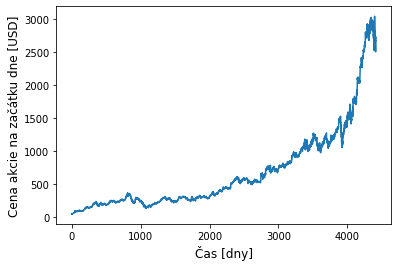

In [34]:
plt.xlabel("Čas [dny]", fontsize = "12")
plt.ylabel("Cena akcie na začátku dne [USD]", fontsize = "12")
plt.plot(t, openp)
plt.show()

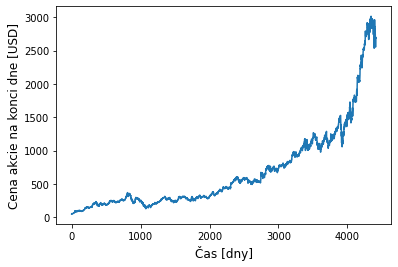

In [35]:
plt.xlabel("Čas [dny]", fontsize = "12")
plt.ylabel("Cena akcie na konci dne [USD]", fontsize = "12")
plt.plot(t, closep)
plt.show()

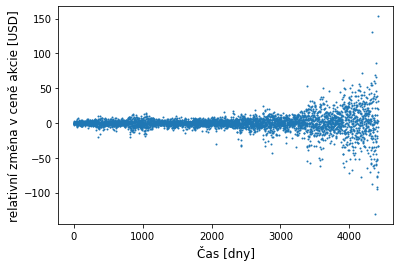

In [36]:
plt.scatter(t, daily_change, s = 1)
plt.xlabel("Čas [dny]", fontsize = "12")
plt.ylabel("relativní změna v ceně akcie [USD]", fontsize = "12")
plt.show()

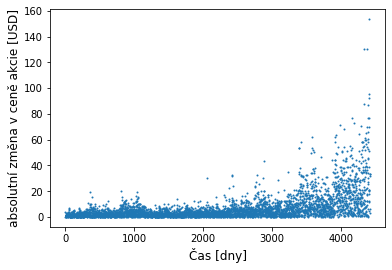

In [37]:
plt.scatter(t, daily_change_abs, s = 1)
plt.xlabel("Čas [dny]", fontsize = "12")
plt.ylabel("absolutní změna v ceně akcie [USD]", fontsize = "12")
plt.show()

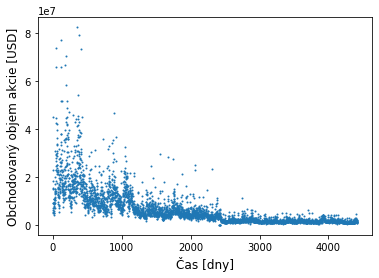

In [38]:
plt.scatter(t, volume, s=1)
plt.xlabel("Čas [dny]", fontsize = "12")
plt.ylabel("Obchodovaný objem akcie [USD]", fontsize = "12")
plt.show()

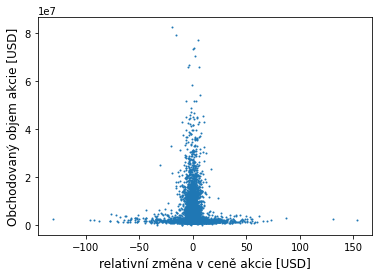

In [39]:
plt.scatter(daily_change, volume, s=1)
plt.xlabel("relativní změna v ceně akcie [USD]", fontsize = "12")
plt.ylabel("Obchodovaný objem akcie [USD]", fontsize = "12")
plt.show()

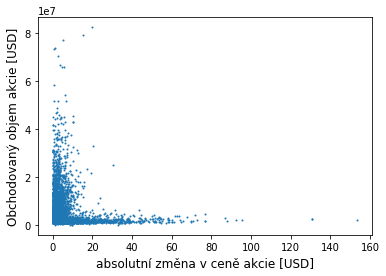

In [40]:
plt.scatter(daily_change_abs, volume, s=1)
plt.xlabel("absolutní změna v ceně akcie [USD]", fontsize = "12")
plt.ylabel("Obchodovaný objem akcie [USD]", fontsize = "12")
plt.show()

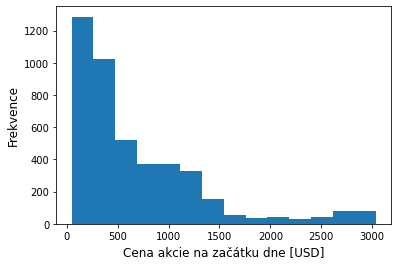

In [41]:
plt.xlabel("Cena akcie na začátku dne [USD]", fontsize = "12")
plt.ylabel("Frekvence", fontsize = "12")
plt.hist(openp, 14)
plt.show()

In [42]:
 print("Modus cen na začátku dne = " + str(int_mode(49.40980148,262.82838849)))

Modus cen na začátku dne = 156.0


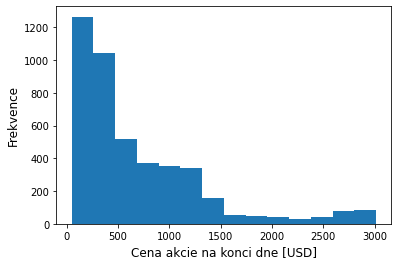

In [43]:
plt.xlabel("Cena akcie na konci dne [USD]", fontsize = "12")
plt.ylabel("Frekvence", fontsize = "12")
plt.hist(closep, 14)
plt.show()

In [44]:
print("Modus cen na konci dne = " + str(int_mode(49.81826782,261.55838667)))

Modus cen na konci dne = 156.0


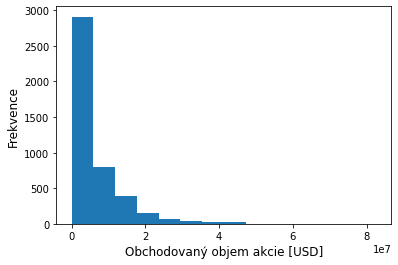

In [45]:
plt.xlabel("Obchodovaný objem akcie [USD]", fontsize = "12")
plt.ylabel("Frekvence", fontsize = "12")
plt.hist(volume, 14)
plt.show()

In [46]:
print("Modus objemů obchodu za den = " + str(int_mode(7.92200000e+03,5.90318693e+06)))

Modus objemů obchodu za den = 2955554.5


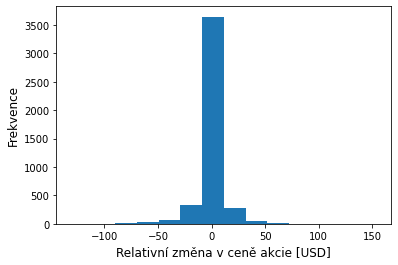

In [47]:
plt.xlabel("Relativní změna v ceně akcie [USD]", fontsize = "12")
plt.ylabel("Frekvence", fontsize = "12")
plt.hist(daily_change, 14)
plt.show()

In [48]:
print("Modus relativní denní změny = " + str(int_mode(-8.82718331,11.45996094)))

Modus relativní denní změny = 1.5


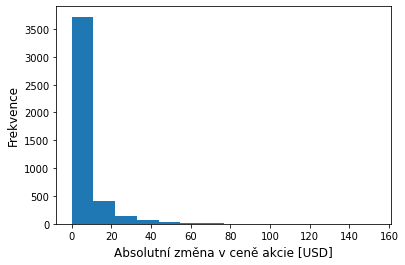

In [49]:
plt.xlabel("Absolutní změna v ceně akcie [USD]", fontsize = "12")
plt.ylabel("Frekvence", fontsize = "12")
plt.hist(daily_change_abs, 14)
plt.show()

In [50]:
print("Modus absolutní denní změny = " + str(int_mode(0,10.96214076)))

Modus absolutní denní změny = 5.5


# Regresní modely

In [51]:
#data
daily_change_abs = np.array(daily_change_abs, dtype=float)
daily_change = np.array(daily_change, dtype=float)
volume = np.array(volume, dtype=float)

In [52]:
print(min(daily_change))
print(max(daily_change))

-130.550048828125
153.469970703125


a = -73915710387.1604 , b = 1.0000018558250954, c = 73923022775.28767,


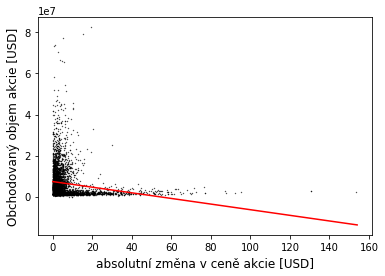

In [65]:
#model
#exponenciální křivka 
def model(x, a,b,c):
    return a*b**x + c

popt, pcov = curve_fit(model,  daily_change_abs,  volume)


#line
line = np.linspace(0, 154, 100)

#print koefs
print("a = %s , b = %s, c = %s," % (popt[0], popt[1], popt[2]))

#plot data
plt.scatter(daily_change_abs, volume, s=0.1,c="black" )

#labels
plt.xlabel("absolutní změna v ceně akcie [USD]", fontsize = "12")
plt.ylabel("Obchodovaný objem akcie [USD]", fontsize = "12")

#plot line
plt.plot(line, model(line, *popt), c="red")

#show graph
plt.show()

In [67]:
print("r2 skóre modelu 1 = "+ str(r2_score(volume, model(daily_change_abs, *popt))))

r2 skóre modelu 1 = 0.033227079743843646


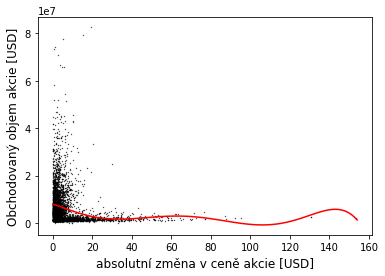

In [55]:
#model2
#polynomiální křivka
model2 = np.poly1d(np.polyfit(daily_change_abs, volume, 6))

#line
line = np.linspace(0, 154, 100)

#plot data
plt.scatter(daily_change_abs, volume, s=0.1,c="black")

#labels
plt.xlabel("absolutní změna v ceně akcie [USD]", fontsize = "12")
plt.ylabel("Obchodovaný objem akcie [USD]", fontsize = "12")

#plot line
plt.plot(line, model2(line), c="red")

#show graph
plt.show()

In [68]:
print("r2 skóre modelu 2 = "+ str(r2_score(volume, model2(daily_change_abs))))

r2 skóre modelu 2 = 0.04646948382661942


a = 6588736.577937295 , b = -87206.2447014129, c = 368154.563163363,


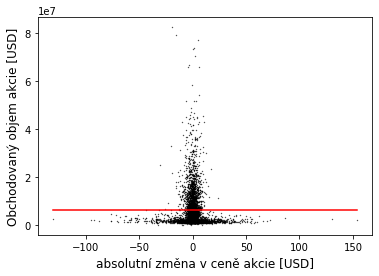

In [57]:
#model 
#Gaussova křivka 
def model3(x, a, b, c):
    return a*np.exp(-np.power(x-b, 2)/(2*np.power(c,2)))

popt, pcov = curve_fit(model3,  daily_change,  volume)

#line
line = np.linspace(-131, 154, 100)

#print koefs
print("a = %s , b = %s, c = %s," % (popt[0], popt[1], popt[2]))

#plot data
plt.scatter(daily_change, volume, s=0.1,c="black")

#labels
plt.xlabel("absolutní změna v ceně akcie [USD]", fontsize = "12")
plt.ylabel("Obchodovaný objem akcie [USD]", fontsize = "12")

#plot line
plt.plot(line, model3(line, *popt), c="red")

#show graph
plt.show()

In [69]:
print("r2 skóre modelu 3 = "+ str(r2_score(volume, model3(daily_change, *popt))))

r2 skóre modelu 3 = -90298929.68228163


# Shrnutí získaných výsledků

## Charakteristiky souboru

Průměr cen na začátku dne = 683.4172131359402
Průměr cen na konci dne = 683.5336392760844
Průměrný objem obchodu za den = 6406664.851935703
Průměr relativní denní změny = 0.11642614014418098
Průměr absolutní denní změny = 6.602463987150531 
Medián cen na začátku dne = 431.0443420410156 
Medián cen na konci dne = 431.2535705566406 
Medián objemu obchodu za den = 3711660.0 
Medián relativní denní změny = 0.004974365234375 
Medián absolutní denní změny = 3.22113037109375 
Maximální relativní denní změna = 153.469970703125 
Minimální relativní denní změna = -130.550048828125 
Maximální absolutní denní změna = 153.469970703125 
Minimální absolutní denní změna = 0.0 
Směrodatná odchylka relativní denní změny = 12.264545721826574 
Směrodatná odchylka absolutní denní změny = 10.336348780263934 
Variační koeficent cen na začátku dne = 0.9370458291024517 
Variační koeficent cen na konci dne = 0.9371364399920072 
Variační koeficent objemu obchodu za den = 1.2142303646598323 
Variační koeficent relativní denní změny = 105.34185627590404 
Variační koeficent absolutní denní změny = 1.5655289904466196 
Počet intervalů u všech souborů = 14 
Délka intervalů cen na začátku dne = 213.41858700343542 
Délka intervalů cen na konci dne = 211.74011884416853 
Délka intervalů denního objemu obchodu = 5895264.928571428 
Délka intervalů relativní denní změny = 20.287144252232142 
Délka intervalů absolutní denní změny = 10.962140764508929 
Modus cen na začátku dne = 156.0 
Modus cen na konci dne = 156.0 
Modus objemů obchodu za den = 2955554.5 
Modus relativní denní změny = 1.5 
Modus absolutní denní změny = 5.5

## Charakteristiky  modelů

r2 skóre modelu 1 = 0.033227079743843646\
r2 skóre modelu 2 = 0.04646948382661942\
r2 skóre modelu 3 = -90298929.68228163

# Závěr

Celkem byly k vyhodnocení korelace změny v ceně akcie Googlu na obchovaném objemu dané akcie,
použity 3 regresní modely a to modely exponenciální, polynomiální a model normálního rozložení. 
Hypotézu se pomocí modelů nepodařilo potvrdit a v použitých datech se robustní, posatelnou korelaci,
nepovedlo nalézt.